# Exploratory Data Analysis

## Imports

In [247]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from library.sb_utils import save_file

## Load The Data

In [248]:
batch_data = pd.read_csv('./data/batch_data_clean.csv')
recipe_data = pd.read_csv('./data/recipe_data_clean.csv')

In [249]:
print(batch_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rcp_id                 1113 non-null   int64  
 1   base_malt_pct          1112 non-null   float64
 2   Boil Kettle            825 non-null    float64
 3   Whirlpool              825 non-null    float64
 4   Fermenter              825 non-null    float64
 5   Total Hops             825 non-null    float64
 6   fermenter_temperature  1096 non-null   float64
 7   cu_low                 1058 non-null   float64
 8   cu_high                1092 non-null   float64
 9   cu_setpoint            1105 non-null   float64
 10  pre_run_dump_volume    553 non-null    float64
 11  original_gravity       1113 non-null   float64
 12  clar_eff               1113 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 113.2 KB
None


In [250]:
print(recipe_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rcp_id                 269 non-null    int64  
 1   base_malt_pct          268 non-null    float64
 2   Boil Kettle            99 non-null     float64
 3   Whirlpool              99 non-null     float64
 4   Fermenter              99 non-null     float64
 5   Total Hops             99 non-null     float64
 6   fermenter_temperature  266 non-null    float64
 7   cu_low                 259 non-null    float64
 8   cu_high                262 non-null    float64
 9   cu_setpoint            263 non-null    float64
 10  pre_run_dump_volume    156 non-null    float64
 11  original_gravity       269 non-null    float64
 12  clar_eff               269 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 27.4 KB
None


## Explore The Data

## Addressing Outliers

## Response Variable Notes
### Due to varying reasions - typos or otherwise - only efficiencies between 60% and 100% were selected.
### This was actually disovered while "pre-wrangling" and getting the SQL sorted out while extracting from the production database.
### 60% was chosen because the lowest few effiencies above 60% appear to be legitimate, while the highest effiency below 60% was a unique recipe that didn't use the typical pelletized hops. This would conceptually have an impact on efficiency, so the first round number efficiency above it was selected for the cutoff.

In [251]:
batch_data.sort_values('clar_eff')

,rcp_id,base_malt_pct,Boil Kettle,Whirlpool,Fermenter,Total Hops,fermenter_temperature,cu_low,cu_high,cu_setpoint,pre_run_dump_volume,original_gravity,clar_eff
738,264,80.829018,1.106087,0.310435,0.000000,1.416522,34.000000,NaN,0.40,0.10,NaN,10.33,61.323395
729,264,80.829018,1.106087,0.310435,0.000000,1.416522,32.700001,0.02,0.30,0.40,15.1,10.33,62.164428
789,338,94.186044,0.000000,0.535152,1.393939,1.929091,32.000000,0.24,0.38,0.40,11.5,8.19,62.693020
110,102,79.104477,7.944444,0.435185,1.196296,9.575926,31.500000,0.06,0.20,0.40,NaN,14.38,63.559322
109,102,79.104477,7.944444,0.435185,1.196296,9.575926,31.500000,0.06,0.20,0.40,NaN,14.38,63.559322
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,78,86.021507,NaN,NaN,NaN,NaN,33.000000,0.30,0.40,0.80,NaN,10.31,99.604222
350,78,86.021507,NaN,NaN,NaN,NaN,33.000000,0.30,0.40,0.80,NaN,10.31,99.604222
463,147,100.000000,1.766518,0.187500,0.000000,1.954018,NaN,0.23,0.35,0.60,NaN,11.70,99.644128
364,78,86.021507,NaN,NaN,NaN,NaN,30.000000,0.30,0.40,0.50,NaN,10.31,99.730458


In [252]:
recipe_data.sort_values('clar_eff')

,rcp_id,base_malt_pct,Boil Kettle,Whirlpool,Fermenter,Total Hops,fermenter_temperature,cu_low,cu_high,cu_setpoint,pre_run_dump_volume,original_gravity,clar_eff
153,297,66.157758,NaN,NaN,NaN,NaN,34.000000,0.300,0.40,0.50,NaN,13.800,63.749999
145,287,93.975902,NaN,NaN,NaN,NaN,34.000000,0.060,0.20,0.40,NaN,7.800,65.476190
268,376,NaN,NaN,NaN,NaN,NaN,37.200001,0.020,0.02,0.40,20.0,10.330,67.659225
166,314,83.221477,NaN,NaN,NaN,NaN,30.000000,0.100,0.20,0.40,NaN,11.500,73.124999
244,403,45.766589,2.519827,0.000000,0.000000,2.519827,33.200001,0.030,0.10,0.40,4.0,9.590,73.464163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,147,100.000000,1.766518,0.187500,0.000000,1.954018,33.200001,0.175,0.30,0.50,NaN,11.675,98.309609
4,89,70.038909,1.978261,0.118261,0.000000,2.096522,39.000000,0.240,0.40,0.55,NaN,10.970,98.331078
82,217,75.705439,0.895522,0.000000,0.000000,0.895522,36.000000,0.700,0.80,0.90,1.9,15.250,99.099099
13,114,79.104477,7.944444,0.435185,1.196296,9.575926,33.500000,0.650,1.20,1.40,NaN,14.360,99.099099


## Feature Notes
All of the features exhibit some level of skewness in their distributions, so a log transform will be applied before outlier analysis. Because zeros are real values in this data set, a scaler is applied prior to the log transform.

base_malt_pct histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


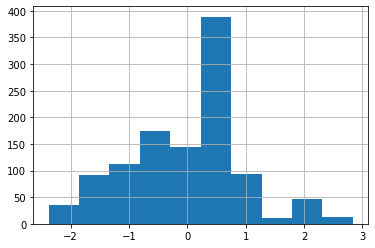

<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


Boil Kettle histogram:


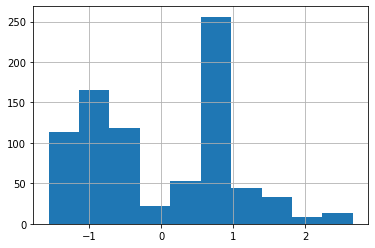

Whirlpool histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


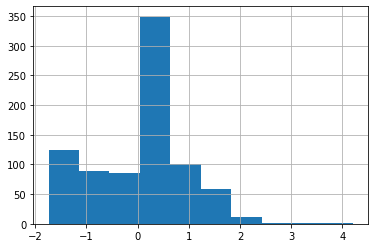

Fermenter histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


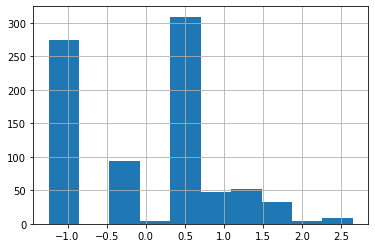

Total Hops histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


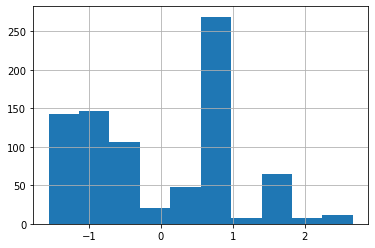

<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


fermenter_temperature histogram:


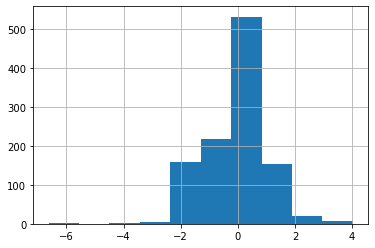

cu_low histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


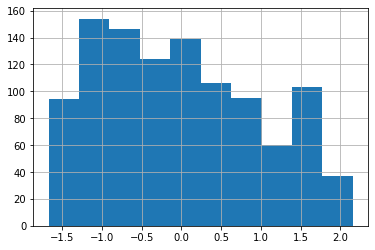

cu_high histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


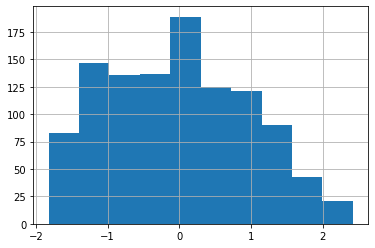

cu_setpoint histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


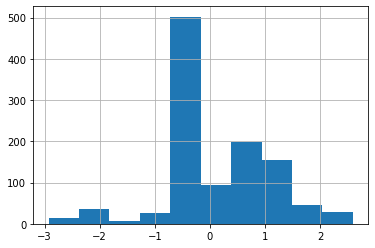

pre_run_dump_volume histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


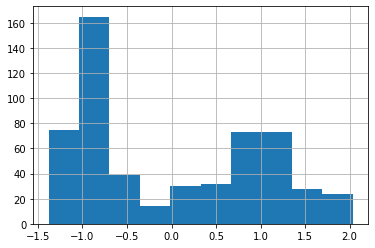

original_gravity histogram:


<ipython-input-253-f75fc0dde1ca>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))


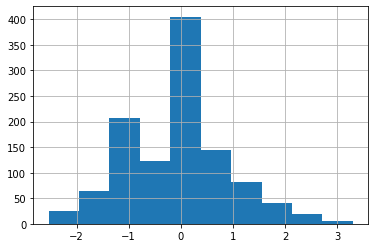

clar_eff histogram:


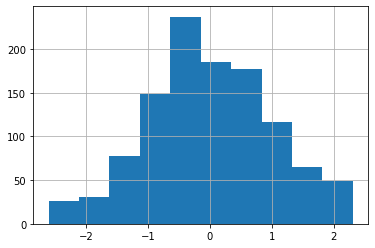

In [253]:
batch_data_log = batch_data[['rcp_id']]

for col in batch_data.columns:
    if col == 'rcp_id':
        continue
    else:
        scaler = MinMaxScaler(feature_range=(1, 2))
        pow_trans = PowerTransformer()
        pipeline = Pipeline(steps=[('s', scaler), ('p', pow_trans)])
        batch_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(batch_data[[col]]))

        print(f"{col} histogram:")
        batch_data_log[col + '_log'].hist()
        plt.show()

base_malt_pct histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


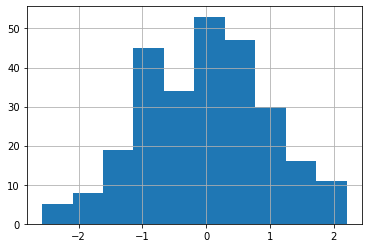

<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


Boil Kettle histogram:


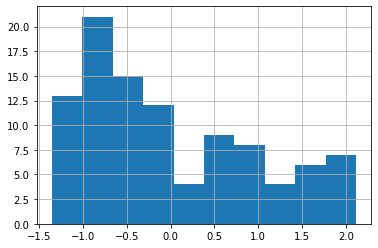

Whirlpool histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


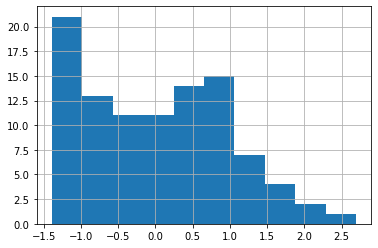

<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


Fermenter histogram:


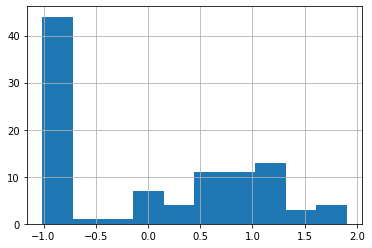

Total Hops histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


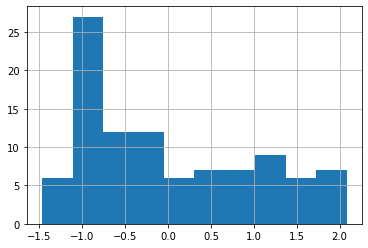

fermenter_temperature histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


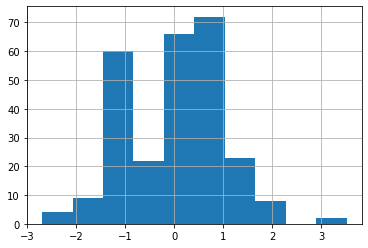

cu_low histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


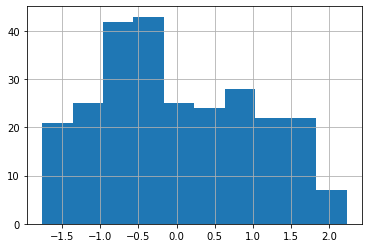

cu_high histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


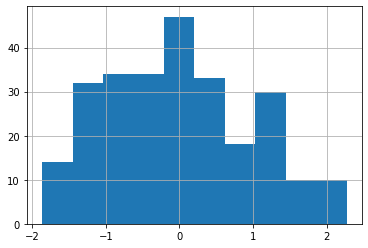

cu_setpoint histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


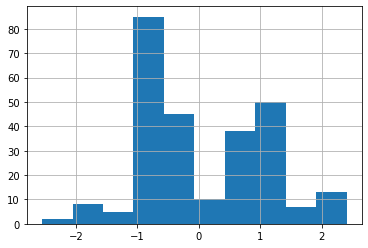

pre_run_dump_volume histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


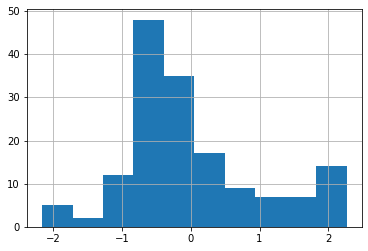

original_gravity histogram:


<ipython-input-254-a5ba18834755>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))


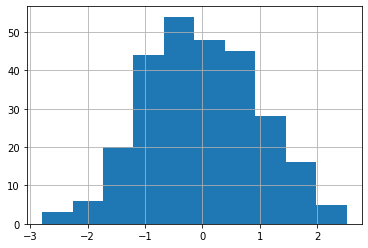

clar_eff histogram:


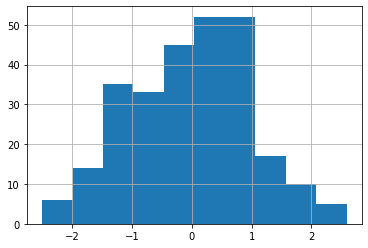

In [254]:
recipe_data_log = recipe_data[['rcp_id']]

for col in recipe_data.columns:
    if col == 'rcp_id':
        continue
    else:
        pscaler = MinMaxScaler(feature_range=(1, 2))
        pow_trans = PowerTransformer()
        pipeline = Pipeline(steps=[('s', scaler), ('p', pow_trans)])
        recipe_data_log[col + '_log'] = pd.DataFrame(pipeline.fit_transform(recipe_data[[col]]))

        print(f"{col} histogram:")
        recipe_data_log[col + '_log'].hist()
        plt.show()


### The distributions look much better. Going to see if there are any outliers outside of three standard deviations and, if so, replace them with a null value.

In [255]:
for col in batch_data_log.columns:
    if col == 'rcp_id':
        continue
    else:
        mean = batch_data_log[col].mean()
        std = batch_data_log[col].std()
        cut_off = std * 3
        
        lower, upper = mean - cut_off, mean + cut_off
        outlier_count = len(batch_data_log[col].dropna()) - len(batch_data_log[(batch_data_log[col] < upper) & (batch_data_log[col] > lower)][col].dropna())
        print(f"{col} has {outlier_count} outlier(s) in a sample size of {len(batch_data_log[col].dropna())}.")
        
        if outlier_count > 0:
            batch_data_log[[col]] = batch_data_log[[col]].mask(batch_data_log[[col]] < lower, other=None)
            batch_data_log[[col]] = batch_data_log[[col]].mask(batch_data_log[[col]] > upper, other=None)
            outlier_count = len(batch_data_log[col].dropna()) - len(batch_data_log[(batch_data_log[col] < upper) & (batch_data_log[col] > lower)][col].dropna())
            print(f"\tMask attempted. {col} now has {outlier_count} outlier(s) in a sample size of {len(batch_data_log[col].dropna())}.")

base_malt_pct_log has 0 outlier(s) in a sample size of 1112.
Boil Kettle_log has 0 outlier(s) in a sample size of 825.
Whirlpool_log has 4 outlier(s) in a sample size of 825.
	Mask attempted. Whirlpool_log now has 0 outlier(s) in a sample size of 821.
Fermenter_log has 0 outlier(s) in a sample size of 825.
Total Hops_log has 0 outlier(s) in a sample size of 825.
fermenter_temperature_log has 10 outlier(s) in a sample size of 1096.
	Mask attempted. fermenter_temperature_log now has 0 outlier(s) in a sample size of 1086.
cu_low_log has 0 outlier(s) in a sample size of 1058.
cu_high_log has 0 outlier(s) in a sample size of 1092.
cu_setpoint_log has 0 outlier(s) in a sample size of 1105.
pre_run_dump_volume_log has 0 outlier(s) in a sample size of 553.
original_gravity_log has 1 outlier(s) in a sample size of 1113.
	Mask attempted. original_gravity_log now has 0 outlier(s) in a sample size of 1112.
clar_eff_log has 0 outlier(s) in a sample size of 1113.


In [256]:
# save the data to a new csv file
datapath = './data'
save_file(batch_data_log, 'batch_data_clean_log.csv', datapath)

A file already exists with this name.

Writing file.  "./data\batch_data_clean_log.csv"


In [257]:
for col in recipe_data_log.columns:
    if col == 'rcp_id':
        continue
    else:
        mean = recipe_data_log[col].dropna().mean()
        std = recipe_data_log[col].dropna().std()
        cut_off = std * 3
        
        lower, upper = mean - cut_off, mean + cut_off
        outlier_count = len(recipe_data_log[col].dropna()) - len(recipe_data_log[(recipe_data_log[col] < upper) & (recipe_data_log[col] > lower)][col].dropna())
        print(f"{col} has {outlier_count} outlier(s) in a sample size of {len(recipe_data_log[col].dropna())}.")
        
        if outlier_count > 0:
            recipe_data_log[[col]] = recipe_data_log[[col]].mask(recipe_data_log[[col]] < lower, other=None)
            recipe_data_log[[col]] = recipe_data_log[[col]].mask(recipe_data_log[[col]] > upper, other=None)
            outlier_count = len(recipe_data_log[col].dropna()) - len(recipe_data_log[(recipe_data_log[col] < upper) & (recipe_data_log[col] > lower)][col].dropna())
            print(f"\tMask attempted. {col} now has {outlier_count} outlier(s) in a sample size of {len(recipe_data_log[col].dropna())}.")

base_malt_pct_log has 0 outlier(s) in a sample size of 268.
Boil Kettle_log has 0 outlier(s) in a sample size of 99.
Whirlpool_log has 0 outlier(s) in a sample size of 99.
Fermenter_log has 0 outlier(s) in a sample size of 99.
Total Hops_log has 0 outlier(s) in a sample size of 99.
fermenter_temperature_log has 2 outlier(s) in a sample size of 266.
	Mask attempted. fermenter_temperature_log now has 0 outlier(s) in a sample size of 264.
cu_low_log has 0 outlier(s) in a sample size of 259.
cu_high_log has 0 outlier(s) in a sample size of 262.
cu_setpoint_log has 0 outlier(s) in a sample size of 263.
pre_run_dump_volume_log has 0 outlier(s) in a sample size of 156.
original_gravity_log has 0 outlier(s) in a sample size of 269.
clar_eff_log has 0 outlier(s) in a sample size of 269.


In [258]:
    # save the data to a new csv file
datapath = './data'
save_file(recipe_data_log, 'recipe_data_clean_log.csv', datapath)

A file already exists with this name.

Writing file.  "./data\recipe_data_clean_log.csv"


## Visualizing High Dimensional Data with PCA

In [259]:
batch_data = batch_data_log
recipe_data = recipe_data_log

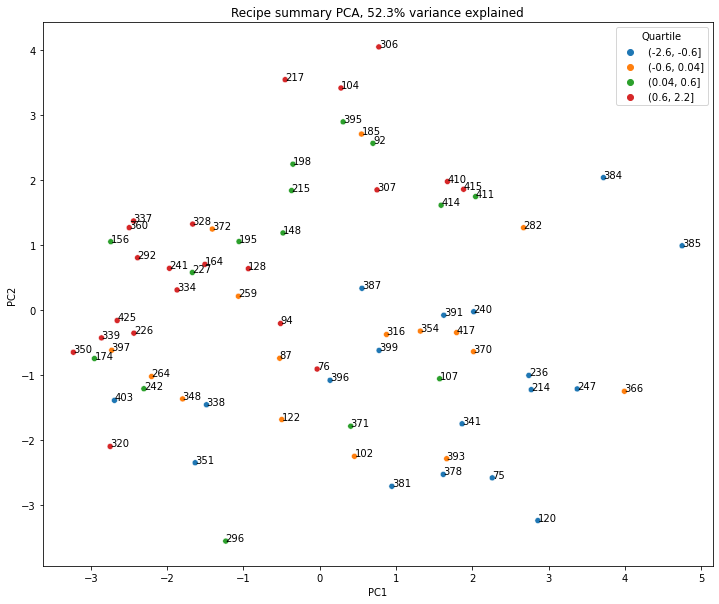

In [263]:
# A "quick" PCA with clarification efficiencies color coded by quartile
# There does seem to be some grouping, but like the box plot above plenty of
# overlap among quartiles and in-group variance.
# Also, less than half the variance is explained by the dataset...

recipe_data_scale = recipe_data.dropna().set_index('rcp_id')
recipe_data_index = recipe_data_scale.index
recipe_data_columns = recipe_data_scale.columns
recipe_data_scale = scale(recipe_data.dropna())

recipe_scaled_df = pd.DataFrame(recipe_data_scale, columns=recipe_data.columns)

recipe_pca = PCA().fit(recipe_data_scale)
recipe_pca_x = recipe_pca.transform(recipe_data_scale)
pc_var = 100 * recipe_pca.explained_variance_ratio_.cumsum()[1]

recipe_avg_eff = batch_data.groupby('rcp_id')['clar_eff_log'].mean()
pca_df = pd.DataFrame({'PC1': recipe_pca_x[:, 0], 'PC2':recipe_pca_x[:, 1]}, index=recipe_data_index)

pca_df = pd.concat([pca_df, recipe_avg_eff], axis=1)
pca_df['Quartile'] = pd.qcut(pca_df.clar_eff_log, q=4, precision=1)
pca_df = pca_df.dropna()

x = pca_df.PC1
y = pca_df.PC2
recipe = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
for s, x, y in zip(recipe, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Recipe summary PCA, {pc_var:.1f}% variance explained');

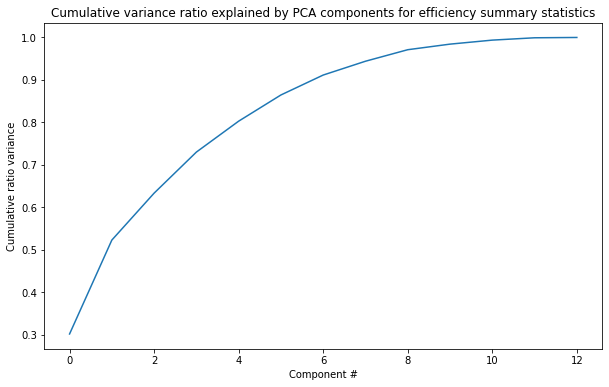

In [264]:
#Plotting the cumulative variance ratio explained by PCA components for efficiency
plt.subplots(figsize=(10, 6))
plt.plot(recipe_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for efficiency summary statistics');

The first two components barely seem to account for half of the variance, verifying the PCA above.

## Looking at Distribution of Target Feature

In [265]:
#Calculate the average 'clar_eff' by recipe
recipe_avg_eff = batch_data.groupby('rcp_id')['clar_eff_log'].mean()
recipe_avg_eff.head()

rcp_id
75   -0.782368
76    0.627118
78    1.161786
87    0.001797
89    1.742259
Name: clar_eff_log, dtype: float64

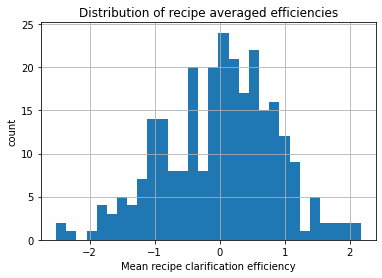

In [266]:
#And plot a histogram of average recipe clarifications
recipe_avg_eff.hist(bins=30)
plt.title('Distribution of recipe averaged efficiencies')
plt.xlabel('Mean recipe clarification efficiency')
plt.ylabel('count');

## Feature correlation heatmap

<AxesSubplot:>

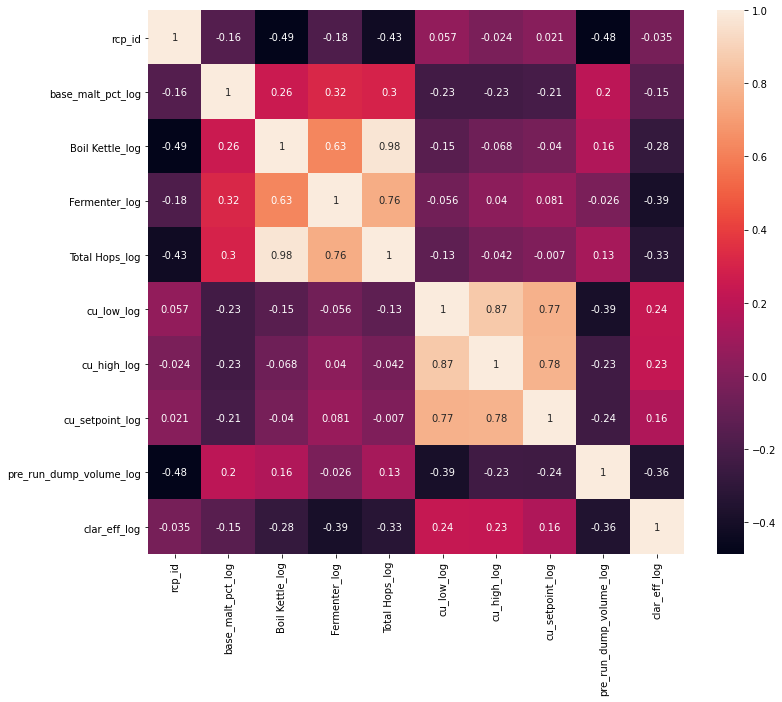

In [267]:
#Generating correlation heatmap for batch-based data
plt.subplots(figsize=(12,10))
sns.heatmap(batch_data.corr(), annot=True)

<AxesSubplot:>

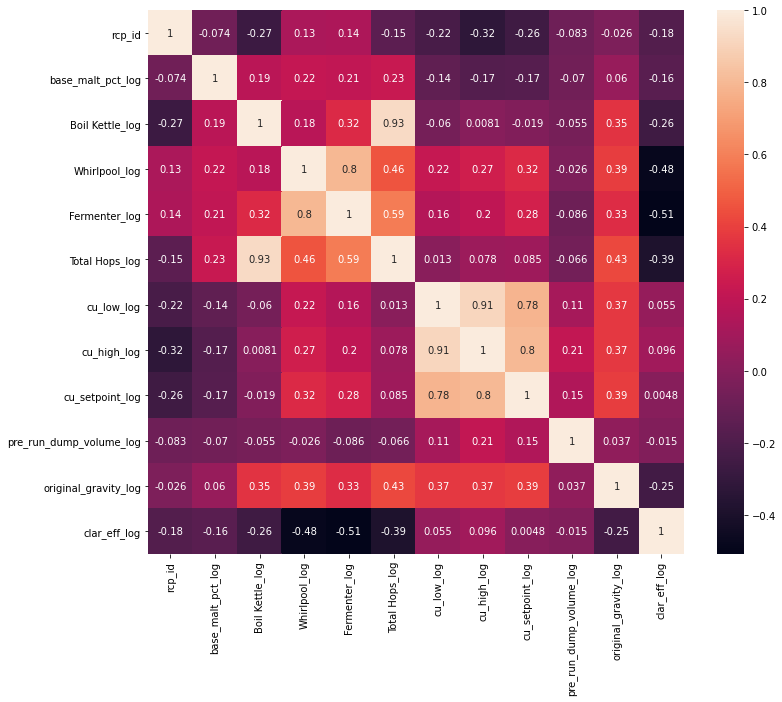

In [268]:
#Generating correlation heatmap for recipe-based data
plt.subplots(figsize=(12,10))
sns.heatmap(recipe_data.corr(), annot=True)

While they both seem to tell the same story with correlation, the batch-based data is much more pronounced in correlation. This is presumably due to the much higher sample size of the batch data. Interestingly, however, recipe data is showing stronger negative correlation with efficiency (clar_eff) and fermenter/whirlpool hops added. Further, the boil kettle and total hops being highly correlated makes sense, as in most recipes the boil kettle hops make up the bulk of total hop additions. 

## Scatterplots of numeric features against clarification efficiency

In [273]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(dataset, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'clar_eff_log', data=dataset, alpha=0.5)
        ax.set(xlabel=col, ylabel='Log Clarification Efficiency')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

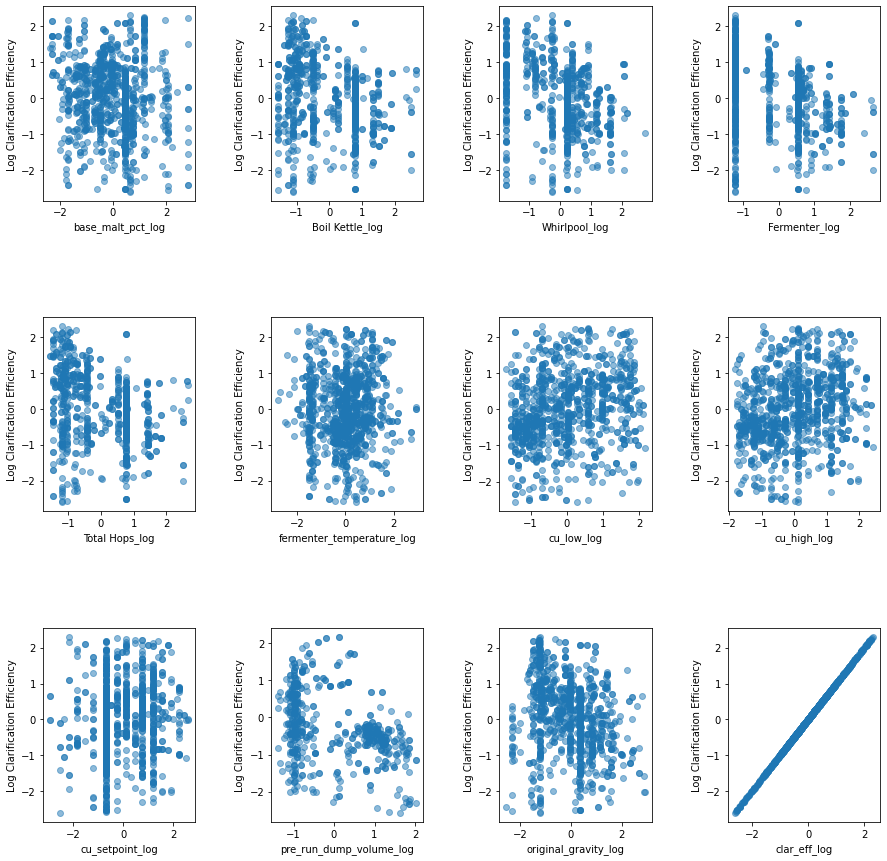

In [274]:
scatterplots(batch_data, features, ncol=4, figsize=(15, 15))

In [277]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [feature for feature in recipe_data.columns if feature not in ['clar_eff_log']]

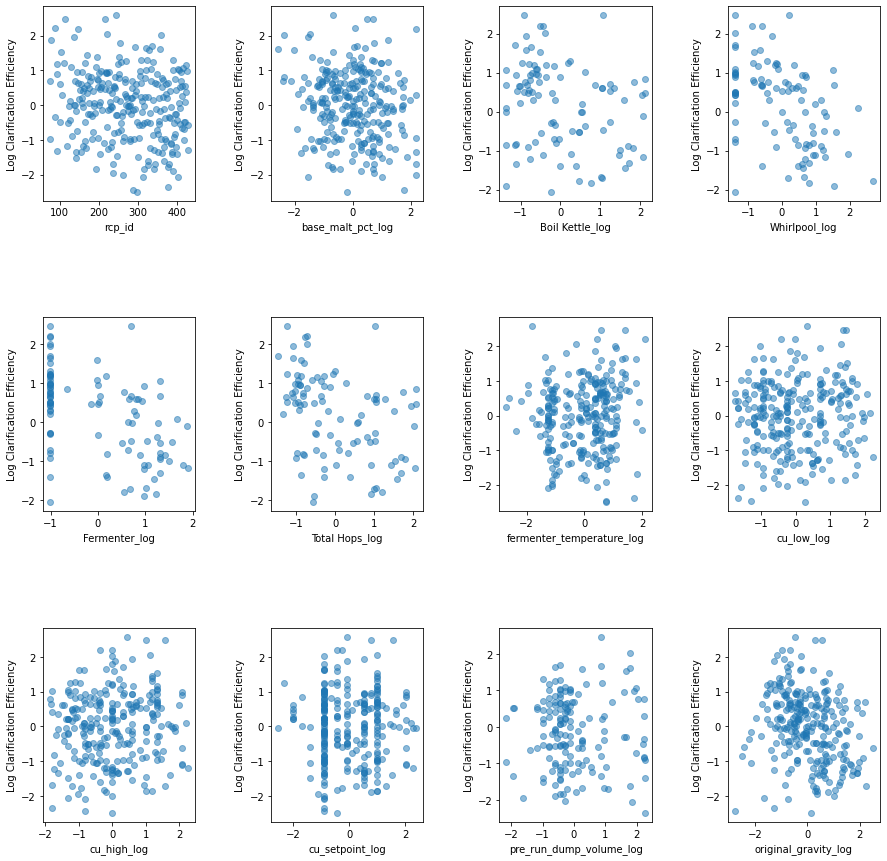

In [278]:
scatterplots(recipe_data, features, ncol=4, figsize=(15, 15))

## Now that I've learned about this, the Seaborn Pairplot

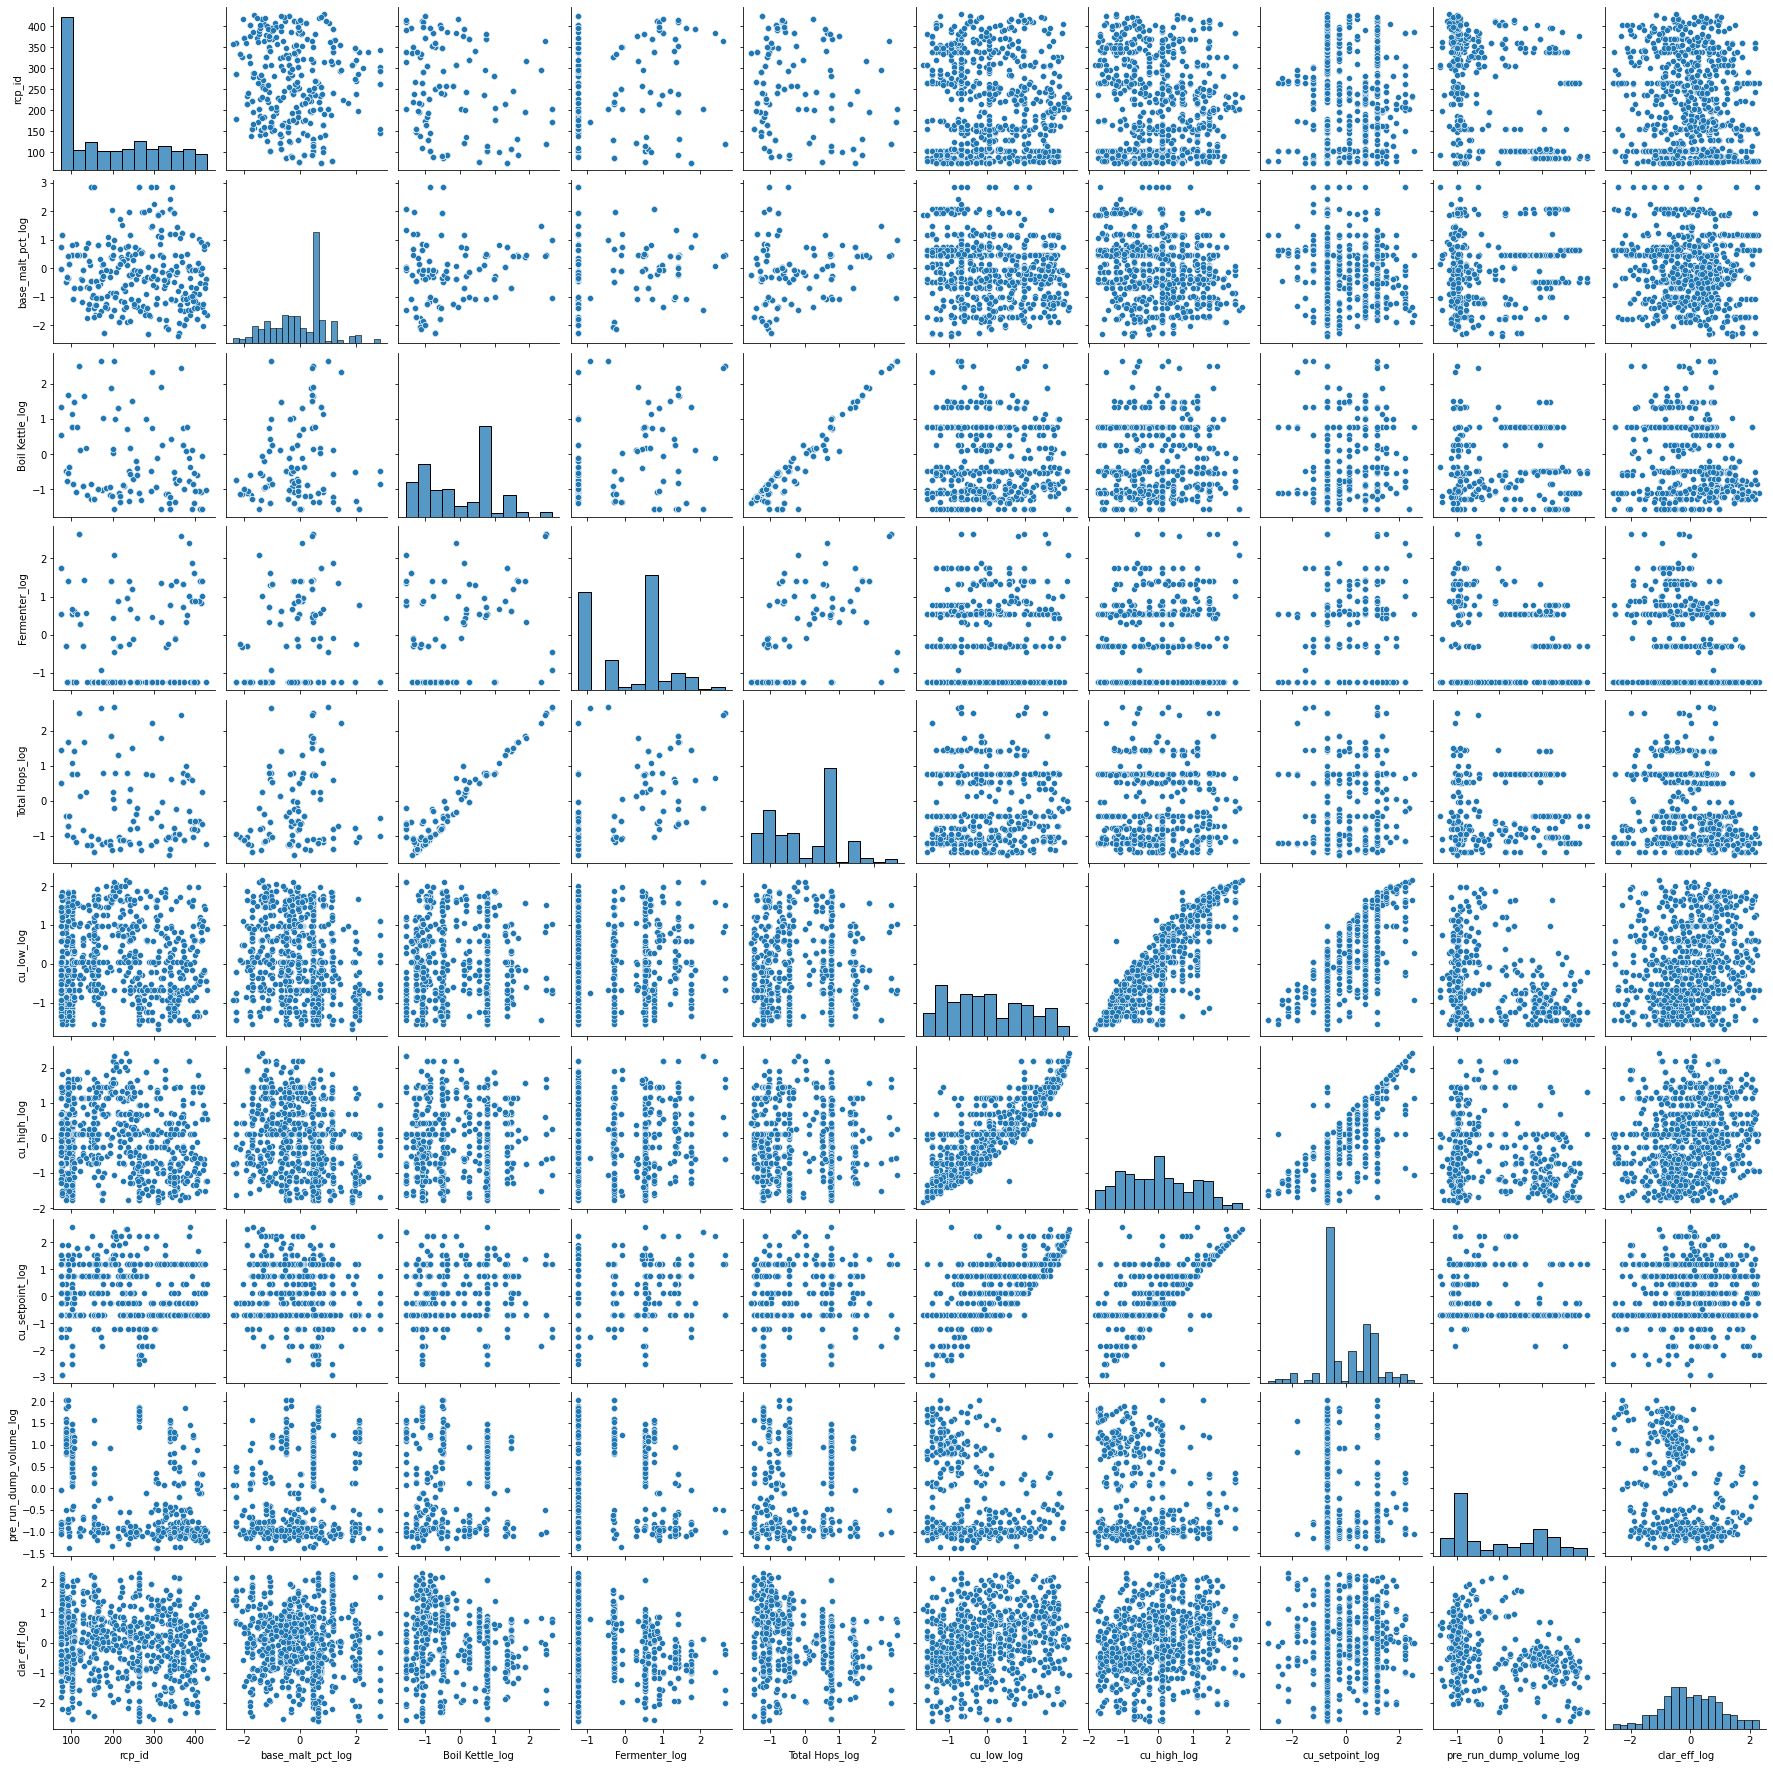

In [272]:
#Create a pairplot for all numeric variables in batch data
sns.pairplot(batch_data,  palette='Set1')
plt.show()

#cleared output to reduce file size

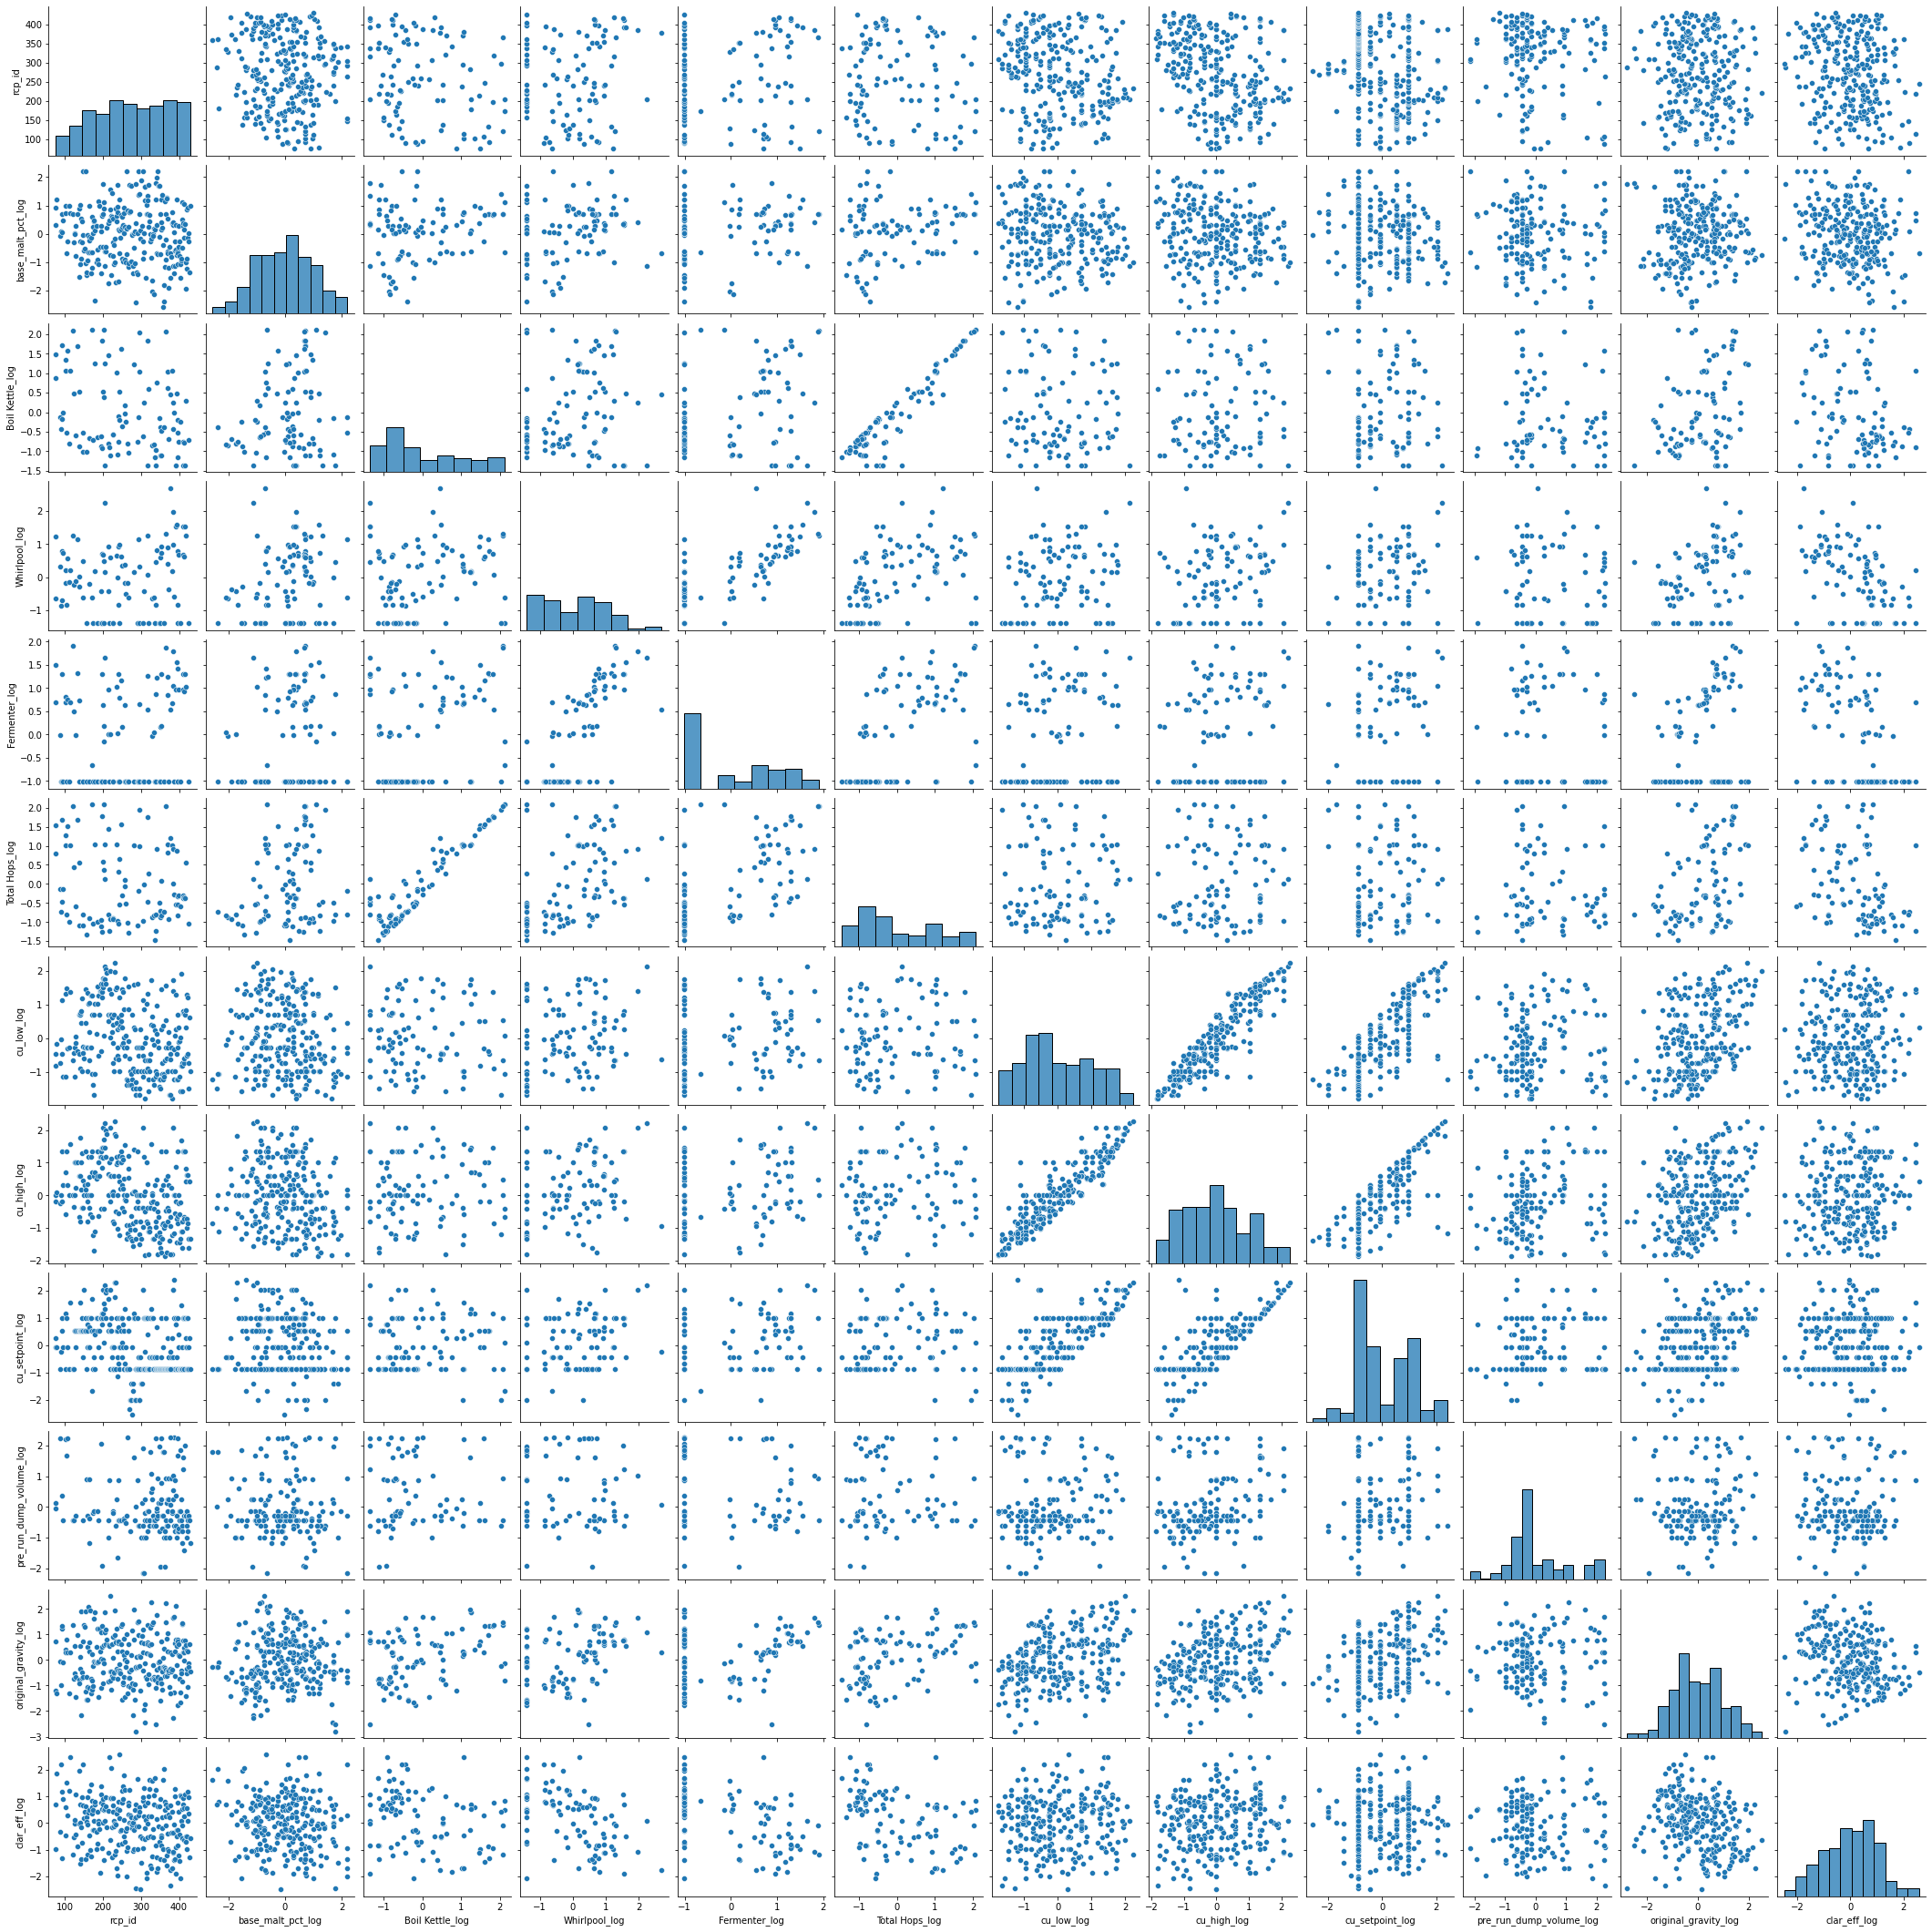

In [279]:
#Create a pairplot for all numeric variables in batch data
sns.pairplot(recipe_data,  palette='Set1')
plt.show()

#cleared output to reduce file size

## Visualize Notable or Interesting Correlations

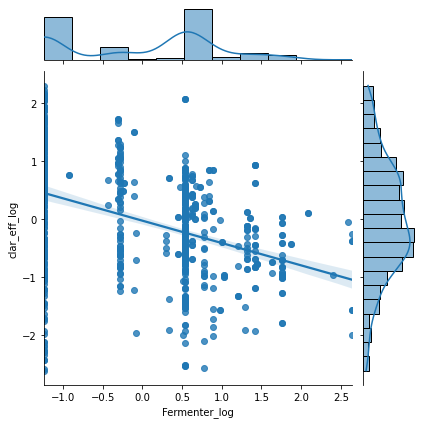

In [280]:
#Plot relationship between Fermenter Hops (dry hop) and clarification efficiency in batch data
sns.jointplot(x='Fermenter_log', y='clar_eff_log', data=batch_data, kind="reg")

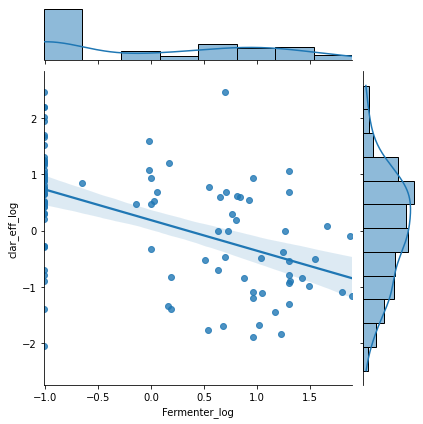

In [281]:
#Plot relationship between Fermenter Hops (dry hop) and clarification efficiency in recipe data
sns.jointplot(x='Fermenter_log', y='clar_eff_log', data=recipe_data, kind="reg");

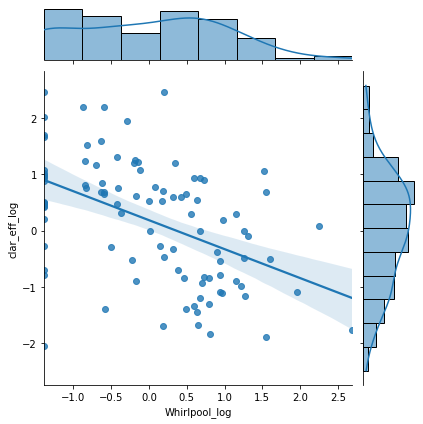

In [282]:
#Plot relationship between Whirlpool Hops and clarification efficiency in recipe data
sns.jointplot(x='Whirlpool_log', y='clar_eff_log', data=recipe_data, kind="reg");